In [146]:
from huggingface_hub import login
from datasets import load_dataset

# Hugging Face API Token ile giriş
login(token="***")

# Veri setini yükleme
ds = load_dataset("bananabot/TrumpSpeeches")


In [147]:
ds=ds["train"].to_pandas()

In [148]:
ds.head()

,text
0,
1,"My fellow Americans, I want to speak to you to..."
2,Making America Great Again has always been abo...
3,"Tragically, over the course of the past year m..."
4,Now I am asking everyone who has ever believed...


In [149]:
txt=" ".join(ds["text"].astype(str))
print(txt[:500])

 My fellow Americans, I want to speak to you tonight about the troubling events of the past week. As I have said, the incursion of the US Capitol struck at the very heart of our Republic. It angered and appalled millions of Americans across the political spectrum. I want to be very clear, I unequivocally condemn the violence that we saw last week. Violence and vandalism have absolutely no place in our country and no place in our movement. Making America Great Again has always been about defendin


In [150]:
import nltk
nltk.download('punkt')     
nltk.download('stopwords')
nltk.download('wordnet')    
nltk.download('omw-1.4')   
lemmatizer = nltk.stem.WordNetLemmatizer()
tokens = nltk.word_tokenize(txt)
stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_tokens = [
    lemmatizer.lemmatize(word.lower()) for word in tokens 
    if word.lower() not in stop_words and word.isalpha()
]
corpus = nltk.Text(filtered_tokens)


[nltk_data] Downloading package punkt to /home/wsl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wsl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/wsl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/wsl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [151]:
print(corpus)


<Text: fellow american want speak tonight troubling event past...>


# **Text and words**

## Searching Text

### concordance function

concordance: every occurence of given world

In [152]:
corpus.concordance("erdogan")

Displaying 3 of 3 matches:
her president xi china putin russia erdogan turkey kim jong un north korea reme
er one country asked call president erdogan turkey get along well said sir plea
utin president xi china kim jong un erdogan turkey chess player guy shot best y


### similar function

similar: other words appear in similar range of context

In [153]:
corpus.similar("turkey")

defeated


### Common context 

allows us to examine just the context that are shared by two or more words

In [154]:
corpus.common_contexts(["iran","israel"])

state_never


### Lexical Dispersion Plot

determine the location of a word in text (positional information)

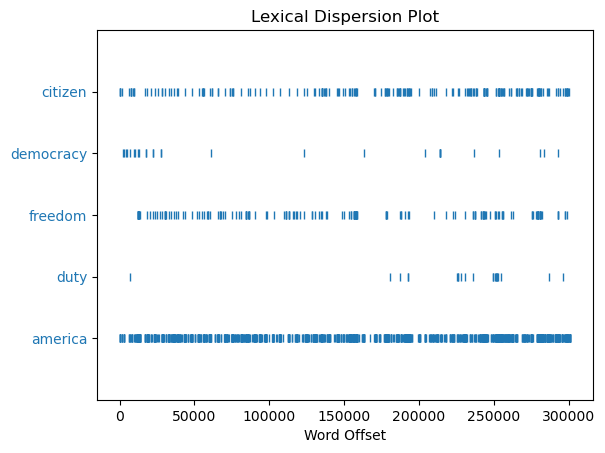

In [155]:
corpus.dispersion_plot(["citizen", "democracy", "freedom", "duty", "america"])

### Generate

generating some random text in various style we have just seen

In [156]:
corpus.generate()

Building ngram index...


planet aggressive early action saved million move put ban china
criticized biden opposed china travel ban country want son daughter
know truth could see thing happening biden candidate rioter looter run
wild know interesting forget four year four year four year ago gave
great prayer tell got get real speech thursday done great oh great
president great left judge like amy way amy great nominated amy coney
barrett faith never stopped working asked group family going tough
night democrat convention right jacksonville timing little bit earlier
right little bit better created million new job added job united state
watch hearing


'planet aggressive early action saved million move put ban china\ncriticized biden opposed china travel ban country want son daughter\nknow truth could see thing happening biden candidate rioter looter run\nwild know interesting forget four year four year four year ago gave\ngreat prayer tell got get real speech thursday done great oh great\npresident great left judge like amy way amy great nominated amy coney\nbarrett faith never stopped working asked group family going tough\nnight democrat convention right jacksonville timing little bit earlier\nright little bit better created million new job added job united state\nwatch hearing'

## Counting Vocabulary 

the length of a text from start to finish, in terms of the words
 and punctuation symbols that appear

In [157]:
len(corpus)

301169

 Corpus has 301,169 words and punctuation symbols, or “tokens.” A token is the
 technical name for a sequence of characters

How many distinct words does the corpus contain?

In [158]:
distinct_words=sorted(set(corpus))
len(distinct_words)

10560

 Although it has 301,169 tokens, this corpus has only 10,560 distinct words, or “word types.” A word type is the form or spelling of the word independently of its specific occurrences in a text—that is, the word considered as a unique item of vocabulary. Our count of 10,560 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

### Lexical Diversity

measure of the lexical richness of the text

In [159]:
from __future__ import division
len(corpus)/len(set(corpus))

28.519791666666666

Each word is used 29 times on average

funciton of it:

In [160]:
def lexical_diversity(corpus):
    return len(corpus)/len(set(corpus))

### Count

 We can count how often a word occurs in a text

In [161]:
corpus.count("biden")

1375

### Percentage

Compute what percentage of the text is taken up by a specific word

In [162]:
corpus.count("biden")/len(corpus)*100

0.45655429343657544

function of it:


In [163]:
def percentage(word,corpus):
    return corpus.count(word)/len(corpus)*100

# **Simple Statistics**

## Frequency Distributions

In [164]:
fdist=nltk.FreqDist(corpus)

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

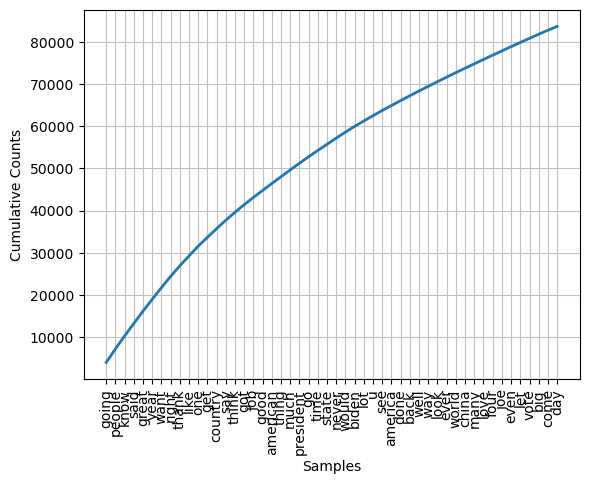

In [165]:
fdist.plot(50,cumulative=True)

## Fine-Grained Selection of Words

{w | w ∈ V & P(w)} \
P is the property function which filters words being more than n characters long.

In [166]:
V=set(corpus)
long_words=[w for w in V if len(w) >15]
sorted(long_words)

['bureaucratically',
 'constitutionality',
 'constitutionally',
 'decriminalization',
 'disproportionately',
 'enthusiastically',
 'environmentalist',
 'institutionalized',
 'intergovernmental',
 'transformational',
 'trunalimunumaprzure',
 'unconstitutional']

 Well, some very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g., antiphilosophists). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times

In [167]:
fdist = nltk.FreqDist(corpus)
sorted([w for w in set(corpus) if len(w) > 7 and fdist[w] > 7])[:10]

['abandoned',
 'abolishing',
 'abortion',
 'absentee',
 'absolute',
 'absolutely',
 'accident',
 'accomplish',
 'accomplished',
 'accomplishment']

## Collocations & Bigrams

A collocation is a sequence of words that occur together unusually often.  \To get a handle on collocations, we start off by extracting from a text a list of word
 pairs, also known as bigrams.

### Collocations

In [168]:
corpus.collocations()

four year; thank much; joe biden; united state; usa usa; new york;
sleepy joe; white house; fake news; year ago; north carolina; law
enforcement; little bit; second amendment; supreme court; great job;
long time; god bless; middle east; donald trump


## Count Other Things

the distribution of word lengths in a text

In [169]:
length_of_words=[len(w) for w in corpus]
fdist_length= nltk.FreqDist(length_of_words)
fdist_length

FreqDist({4: 72774, 5: 58336, 6: 40880, 7: 34623, 3: 34580, 8: 24635, 9: 15016, 10: 9089, 11: 3230, 2: 2629, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

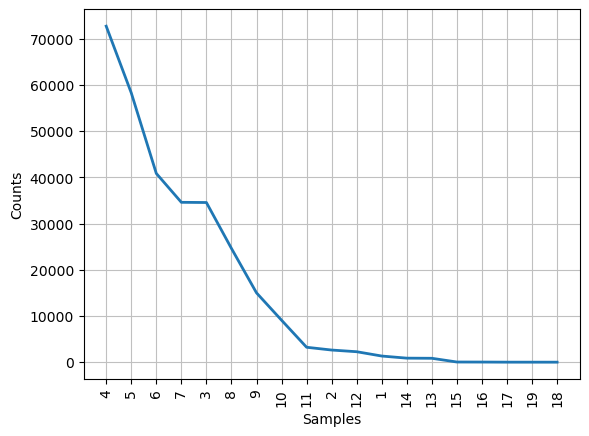

In [170]:
fdist_length.plot()

# **Automatic Natural Language Understanding**

## Automatic Natural Language Understanding

 In word sense disambiguation we want to work out which sense of a word was in tended in a given context.  
 We automatically disambiguate words using context, exploiting the simple fact that nearby words have closely related meanings.

 ## Pronoun Resolution

 A deeper kind of language understanding is to work out “who did what to whom,” i.e., to detect the subjects and objects of verbs.  
 Computational techniques for tackling this problem include anaphora resolution—identifying what a pronoun or noun phrase refers to—and semantic  role labeling—identifying how a noun phrase relates to the verb (as agent, patient, instrument, and so on).  
 Working out the sense of a word, the subject of a verb, and the antecedent of a pronoun are steps in establishing the meaning of a sentence, things we  would expect a language understanding system to be able to do.

 